In [25]:
import IPython.display as ipd
from scipy.io.wavfile import read, write
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import butter,filtfilt,lfilter
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy import fftpack
import scipy as scipy
import scipy.signal as signal
from os import listdir
from os.path import isfile, join
import pandas as pd

In [20]:
import ctypes

### <span style='color:Blue'> Generate Gausian noise & sine wave  </span>

In [2]:
def create_noise(num_samples, amplitude=0.2, random_seed=None):
    if random_seed:
        np.random.seed(random_seed)
    noise = amplitude * np.random.randn(num_samples)
    return noise

#create a simple sine wave
def create_signal(freq, amplitude, sampling_rate, dur_sec):
    #The variaable `time` holds the expected number of measurements taken: 
    #duration in seconds multiplied by the sampling rate. 
    time = np.linspace(0, dur_sec, int(np.floor(dur_sec*sampling_rate)))
    full_circle = 2 * np.pi
    sinewave_samples = amplitude * np.sin((freq*full_circle)*time)
    return sinewave_samples, sampling_rate, time

### <span style='color:Blue'> Filtering  </span>

In [2]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_bandpass_freqrs(lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    w, h = signal.freqz(b, a)
    
    return w, h

### <span style='color:Blue'> Load accelerometer data  </span>

In [3]:
def load_acc(data_dir, timestamp):
    sample_path = data_dir + '/' + str(walking_timestamp) + sample_extension
    data = np.loadtxt(open(sample_path))
    x_raw = data[:, 1]
    y_raw = data[:, 2]
    z_raw = data[:, 3]
    time = data[:, 0]

    df = pd.DataFrame({'index': time,
                            'x_raw': x_raw,
                            'y_raw': y_raw,
                            'z_raw': z_raw})

    df = df.set_index('index')
    
    return df

## Filter & filter orders

In [4]:
# Filter parameters 
T = 1.0         # sample length (second)
fs = 44100.0       # sample rate, Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [5]:
data_dir = "/Users/yzhao/Documents/Data/Assignment2_data/098A72A5-E3E5-4F54-A152-BBDA0DF7B694"
sample_list = [f for f in listdir(data_dir) if isfile(join(data_dir, f))]
sample_extension = ".m_raw_acc.dat"
activity_label_path = "/Users/yzhao/Documents/Data/Assignment2_data/activity_labels/person1.original_labels.csv.gz"
activity_label = pd.read_csv(activity_label_path, compression='gzip')

In [6]:
np.where(activity_label["original_label:WALKING"] == 1)[0]

array([  21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   33,   34,  328,  329,  330,  331,  332,  333,  334,  335,
        336,  337,  338,  339,  340,  341,  342,  343,  344,  345,  346,
        347,  348,  349,  350,  381,  458, 1161, 1162, 1163, 1164, 1165,
       1166, 1206, 1207, 1208, 1209, 1291, 1302, 1439, 1442, 1746, 1747,
       1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758,
       1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769,
       1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780,
       1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791,
       1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 2640, 2641, 2642,
       2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653,
       2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664,
       2665, 2666, 2667, 3172, 3173, 3178, 3179, 3180, 4713, 4714, 4715,
       4716, 4717, 4718, 4719, 4720, 4721, 4722, 47

In [8]:
walking_timestamp = activity_label.iloc[1762, :]["timestamp"]

### <span style='color:Red'>Activity: Experiment with filter orders</span>

In [9]:
walking_timestamp

1438822328

In [9]:
acc = load_acc(data_dir, 1438822328)

In [12]:
## Here we defined the relative time (i.e. convert index to seconds)
relative_time = np.linspace(0, 20, 20 * 40)

## Here we get the y-axis reading from accelerometer 
acc_sig = acc.y_raw

<Figure size 432x288 with 0 Axes>

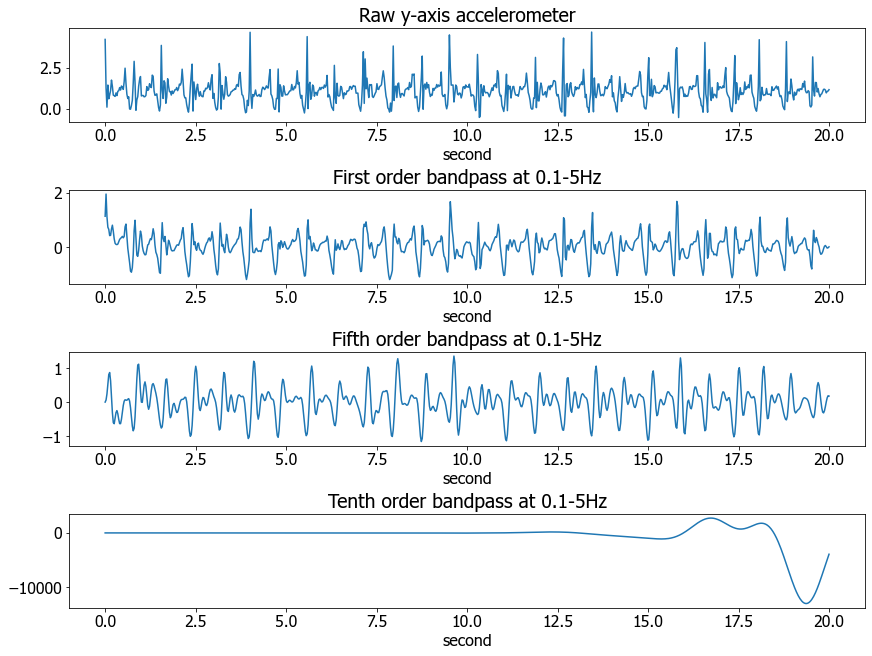

In [11]:
## TO DO: Fill in some filter codes 
first_order_filter_x = butter_bandpass_filter(acc_sig, 0.5, 5, 40, 1)
second_order_filter_x = butter_bandpass_filter(acc_sig, 0.5, 5, 40, 5)
third_order_filter_x = butter_bandpass_filter(acc_sig, 0.5, 5, 40, 10)


## This code generate a relatively nice 4*1 figure 
plt.figure(1)
plt.clf()
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = '16'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']
fig, axs = plt.subplots(4, 1, constrained_layout=True)

# TO DO: Plot your raw signal
axs[0].plot(relative_time, acc_sig)
axs[0].set_xlabel('second')
axs[0].set_title('Raw y-axis accelerometer')

# TO DO: Plot your 1st order filtered signal
axs[1].plot(relative_time, first_order_filter_x)
axs[1].set_xlabel('second')
axs[1].set_title('First order bandpass at 0.1-5Hz')

# To DO: Plot your 5th order filtered signal
axs[2].plot(relative_time, second_order_filter_x)
axs[2].set_xlabel('second')
axs[2].set_title('Fifth order bandpass at 0.1-5Hz')

# TO DO: Plot your 10th order filtered signal 
axs[3].plot(relative_time, third_order_filter_x)
axs[3].set_xlabel('second')
axs[3].set_title('Tenth order bandpass at 0.1-5Hz')


plt.show()

## Generate a signal

In [12]:
# Generate white noise
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) * 0.2 for i in range(44100)]
series = Series(series)

In [13]:
sr_comp = 44100
duration = 1

samps1, sr1, time1 = create_signal(freq=500, amplitude=0.7, sampling_rate=sr_comp, dur_sec=duration)
samps2, sr2, time2 = create_signal(freq=2000, amplitude=0.5, sampling_rate=sr_comp, dur_sec=duration)
samps3, sr3, time3 = create_signal(freq=12000, amplitude = 0.3, sampling_rate=sr_comp, dur_sec=duration)

sin_mult = samps1+samps2+samps3
#noise2add = create_noise(num_samples = len(sin_mult))
sin_noisy = sin_mult + series

## Analyzing a signal

In [14]:
ipd.Audio(sin_noisy, rate=sr_comp)

In [40]:
write("unknown_sin_wave.wav", sr_comp, sin_noisy)

### Plot raw signal in time domain

In [15]:
## Change wav_fname to your .wav path
wav_fname = "/Users/yzhao/Documents/Cornell/Ubicomp2022/Lab/A2_Lab/unknown_sin_wave.wav"
samplerate, sin_noisy = read(wav_fname)
duration = 1

Text(0.5, 1.0, 'Zoom in to first 200 points of the sine wave')

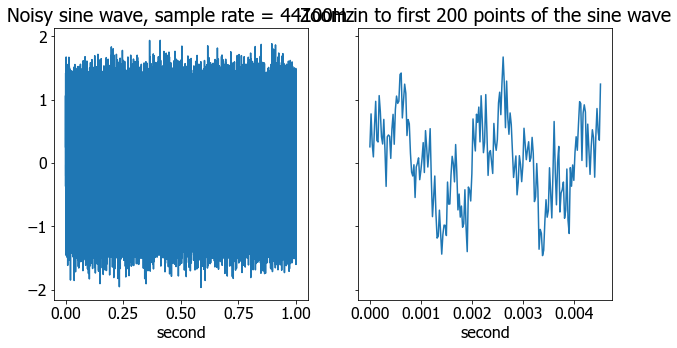

In [16]:
x = [t / samplerate for t in range(sin_noisy.size)]

plt.rcParams['figure.figsize'] = [10, 5]
fig, axs = plt.subplots(1, 2, sharey='row')

axs[0].plot(x, sin_noisy)
axs[0].set_xlabel('second')
axs[0].set_title('Noisy sine wave, sample rate = 44100Hz')

axs[1].plot(x[0:200], sin_noisy[0:200])
axs[1].set_xlabel('second')
axs[1].set_title('Zoom in to first 200 points of the sine wave')

### FFT

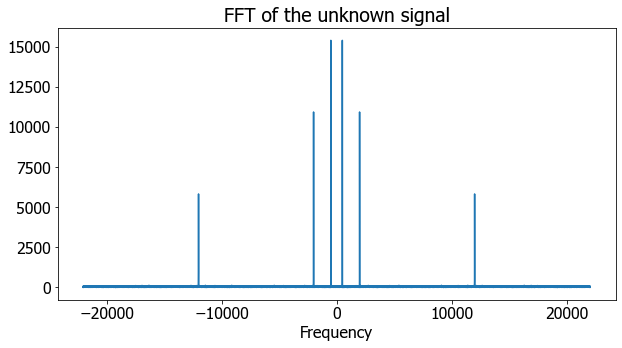

In [17]:
# Number of samples in normalized_tone
N = samplerate * duration

yf = fft(sin_noisy)
xf = fftfreq(N, 1 / samplerate)

plt.plot(xf, np.abs(yf))
plt.title("FFT of the unknown signal")
plt.xlabel("Frequency")
plt.show()

### RFFT

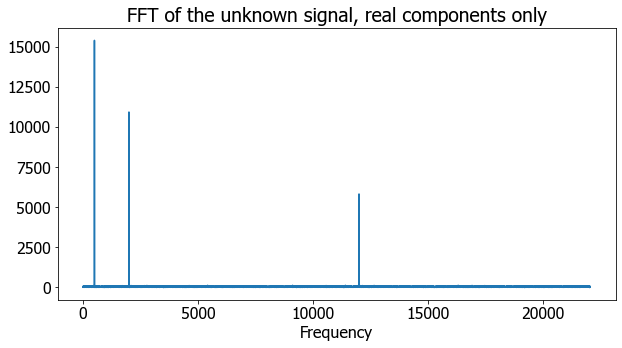

In [18]:
# Note the extra 'r' at the front
yf = rfft(sin_noisy)
xf = rfftfreq(N, 1 / samplerate)

plt.plot(xf, np.abs(yf))
plt.title("FFT of the unknown signal, real components only")
plt.xlabel("Frequency")
plt.show()

## Frequency over time

In [32]:
ipd.Audio("another_unknown_signal.wav")

In [20]:
samplerate, sine_sweep = read('another_unknown_signal.wav')

/var/folders/rh/2xr8vb_n5618qg9fqj4n60400000gn/T/ipykernel_1166/2693059216.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, sine_sweep = read('another_unknown_signal.wav')


In [48]:
samplerate

44100

Text(0.5, 1.0, 'Zoom in to last 100 points of the signal')

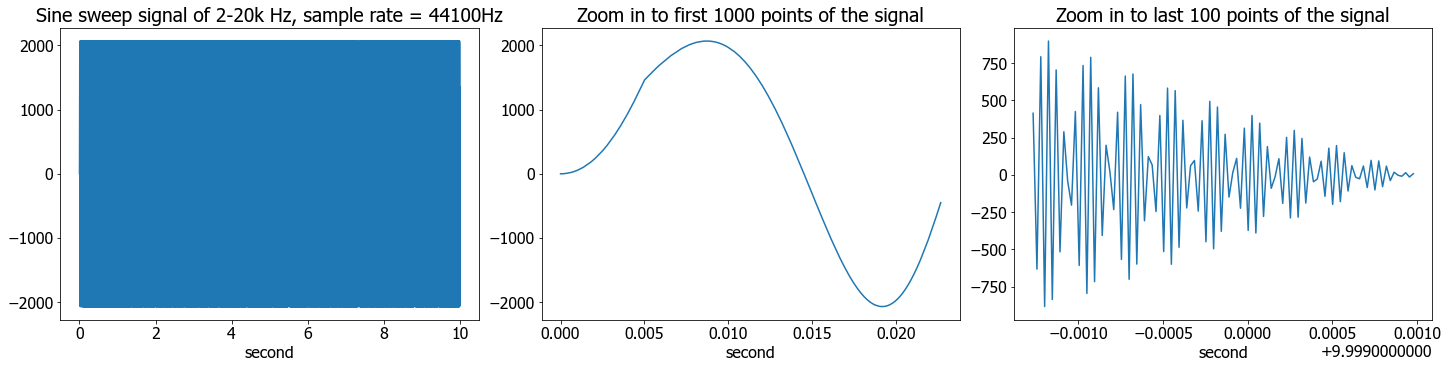

In [21]:
x = [t / samplerate for t in range(sine_sweep.size)]

plt.rcParams['figure.figsize'] = [20, 5]
fig, axs = plt.subplots(1, 3, constrained_layout=True)

axs[0].plot(x, sine_sweep)
axs[0].set_xlabel('second')
axs[0].set_title('Sine sweep signal of 2-20k Hz, sample rate = 44100Hz')

axs[1].plot(x[:1000], sine_sweep[:1000])
axs[1].set_xlabel('second')
axs[1].set_title('Zoom in to first 1000 points of the signal')

axs[2].plot(x[-100:], sine_sweep[-100:])
axs[2].set_xlabel('second')
axs[2].set_title('Zoom in to last 100 points of the signal')


#### Taking FFT of the entire sine sweep

Text(0.5, 1.0, 'FFT of the entire signal length (10s)')

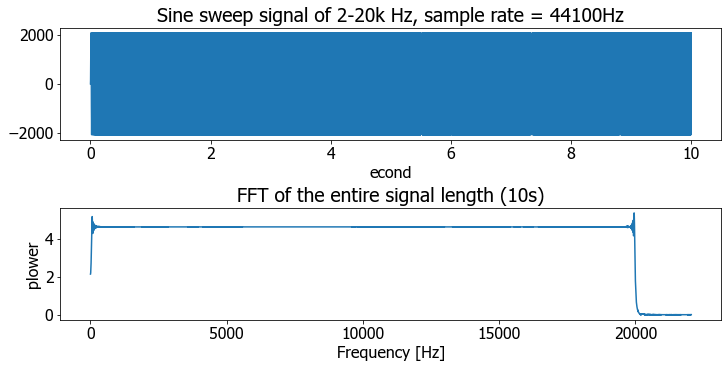

In [22]:
N = sine_sweep.size

sig_fft = fftpack.fft(sine_sweep, n = N)
#sig_power = np.abs(sig_fft)**2
sig_freq = fftpack.fftfreq(n = N, d=1/samplerate)[:N//2]

plt.rcParams['figure.figsize'] = [10, 5]
fig, axs = plt.subplots(2, 1, sharex= False, constrained_layout=True)

axs[0].plot(x, sine_sweep)
axs[0].set_xlabel('econd')
axs[0].set_title('Sine sweep signal of 2-20k Hz, sample rate = 44100Hz')

axs[1].plot(sig_freq, 2.0/N * np.abs(sig_fft[:N//2]))
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('plower')
axs[1].set_title('FFT of the entire signal length (10s)')

#### Let's look at smaller chunks of this time series

Text(0.5, 1.0, 'FFT of 1s chunk')

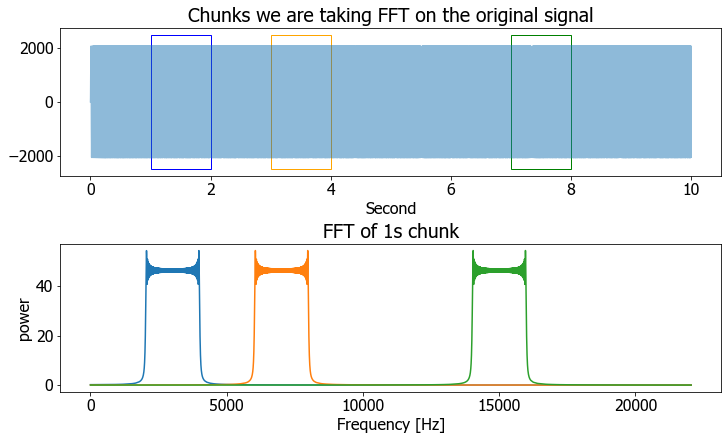

In [23]:
# two windows 
N = 44100 

window_margin = range(10)
vline_index = [t for t in window_margin]

plt.rcParams['figure.figsize'] = [10, 6]
fig, axs = plt.subplots(2, 1, sharex= False, constrained_layout=True)
axs[0].plot(x, sine_sweep, alpha = 0.5)
axs[0].add_patch(Rectangle((1, -2500), 1, 5000, edgecolor='blue',  facecolor='none'))
axs[0].add_patch(Rectangle((3, -2500), 1, 5000, edgecolor='orange',  facecolor='none'))
axs[0].add_patch(Rectangle((7, -2500), 1, 5000, edgecolor='green',  facecolor='none'))
axs[0].set_xlabel('Second')
axs[0].set_title('Chunks we are taking FFT on the original signal')

for i in [1, 3, 7]:
    signal = sine_sweep[i*N : (i+1) * N]
    sig_fft = fft(signal, n = N)
    #sig_power = np.abs(sig_fft)**2
    sig_freq = fftfreq(n = N, d=1/samplerate)[:N//2]
    axs[1].plot(sig_freq, 2.0/N * np.abs(sig_fft[:N//2]))
    
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('power')
axs[1].set_title('FFT of 1s chunk')

#### Let's look at a even smaller chunk

Text(0.5, 1.0, 'FFT of the 0.1 second chunk')

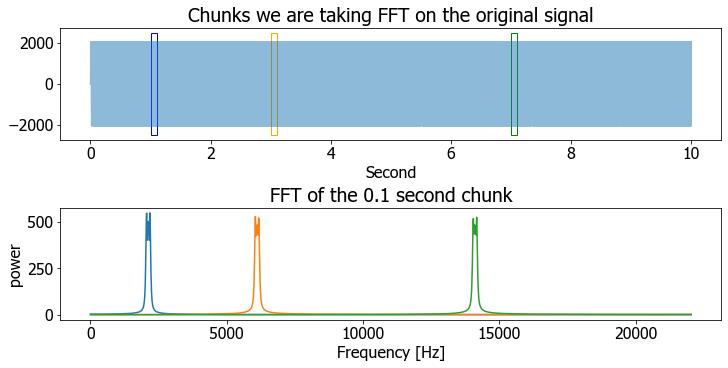

In [26]:
N = 4410

window_margin = range(10)
vline_index = [t for t in window_margin]

fig, axs = plt.subplots(2, 1, sharex= False, constrained_layout=True)
plt.rcParams['figure.figsize'] = [10, 5]

axs[0].plot(x, sine_sweep, alpha = 0.5)
axs[0].add_patch(Rectangle((1, -2500), 0.1, 5000, edgecolor='blue',  facecolor='none'))
axs[0].add_patch(Rectangle((3, -2500), 0.1, 5000, edgecolor='orange',  facecolor='none'))
axs[0].add_patch(Rectangle((7, -2500), 0.1, 5000, edgecolor='green',  facecolor='none'))
axs[0].set_xlabel('Second')
axs[0].set_title('Chunks we are taking FFT on the original signal')

for i in [10, 30, 70]:
    signal = sine_sweep[i*N : (i+1) * N]
    sig_fft = fft(signal, n = N)
    #sig_power = np.abs(sig_fft)**2
    sig_freq = fftpack.fftfreq(n = N, d=1/samplerate)[:N//2]

    axs[1].plot(sig_freq, 2.0/N * np.abs(sig_fft[:N//2]))
    
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('power')
axs[1].set_title('FFT of the 0.1 second chunk')

### Spectrogram

Text(0, 0.5, 'Frequency')

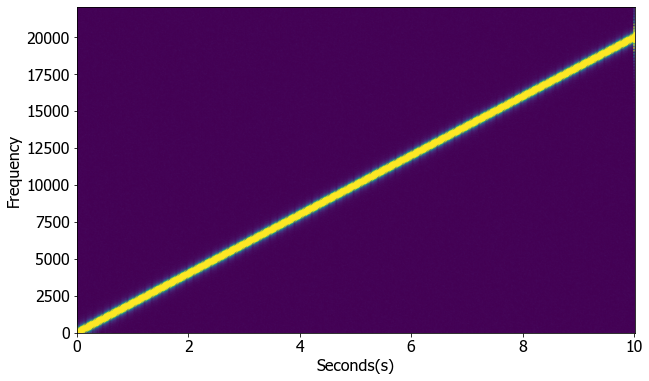

In [33]:
import scipy.signal as signal

plt.rcParams['figure.figsize'] = [10, 6]
f, t, Zxx = signal.stft(sine_sweep, samplerate, nperseg = 1024, noverlap = 512, return_onesided=True)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1.0, shading='gouraud')
plt.xlabel("Seconds(s)")
plt.ylabel("Frequency")

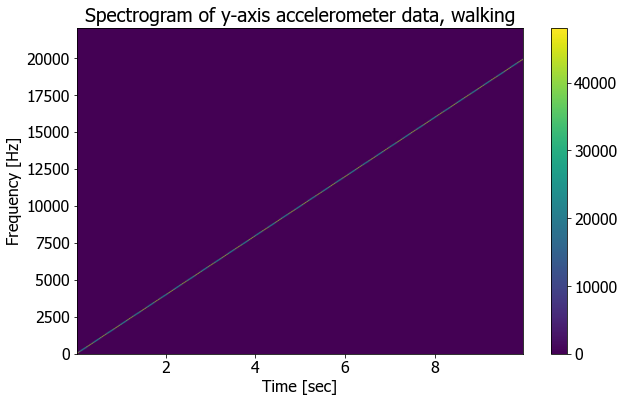

In [31]:
plt.rcParams["figure.figsize"] = (10, 6)

f, t, Sxx = signal.spectrogram(x =sine_sweep, fs = samplerate, nperseg = 1024, noverlap = 0)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of y-axis accelerometer data, walking")
plt.colorbar(c)
plt.show()

### <span style='color:Red'>Activity: Experiment with window and overlap </span>

Text(0.5, 1.0, 'FFT size = 1024, Overlap = 50%')

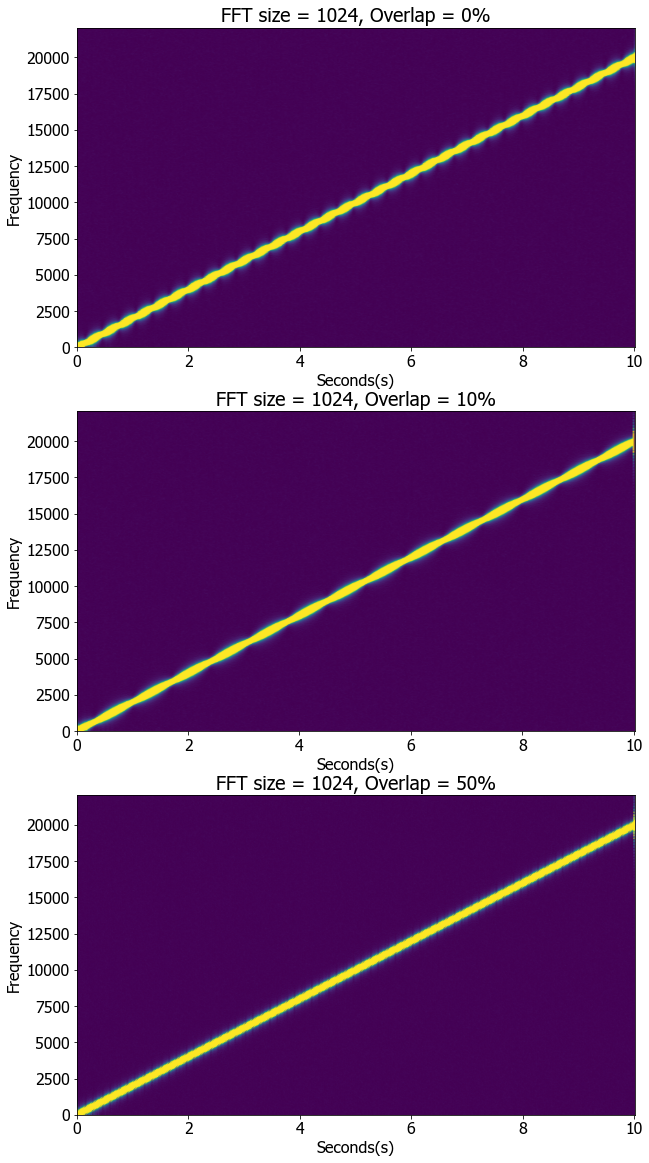

In [65]:
plt.rcParams['figure.figsize'] = [10, 20]
fig, axs = plt.subplots(3, 1, sharey='row')

f, t, Zxx = signal.stft(sine_sweep, samplerate, nperseg = 1024, noverlap = 0, return_onesided=True)
axs[0].pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1.0, shading='gouraud')
axs[0].set_xlabel("Seconds(s)")
axs[0].set_ylabel("Frequency")
axs[0].set_title("FFT size = 1024, Overlap = 0%")

f, t, Zxx = signal.stft(sine_sweep, samplerate, nperseg = 1024, noverlap = 1024//10, return_onesided=True)
axs[1].pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1.0, shading='gouraud')
axs[1].set_xlabel("Seconds(s)")
axs[1].set_ylabel("Frequency")
axs[1].set_title("FFT size = 1024, Overlap = 10%")

f, t, Zxx = signal.stft(sine_sweep, samplerate, nperseg = 1024, noverlap = 1024//2, return_onesided=True)
axs[2].pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1.0, shading='gouraud')
axs[2].set_xlabel("Seconds(s)")
axs[2].set_ylabel("Frequency")
axs[2].set_title("FFT size = 1024, Overlap = 50%")

Text(0.5, 1.0, 'FFT size = 128')

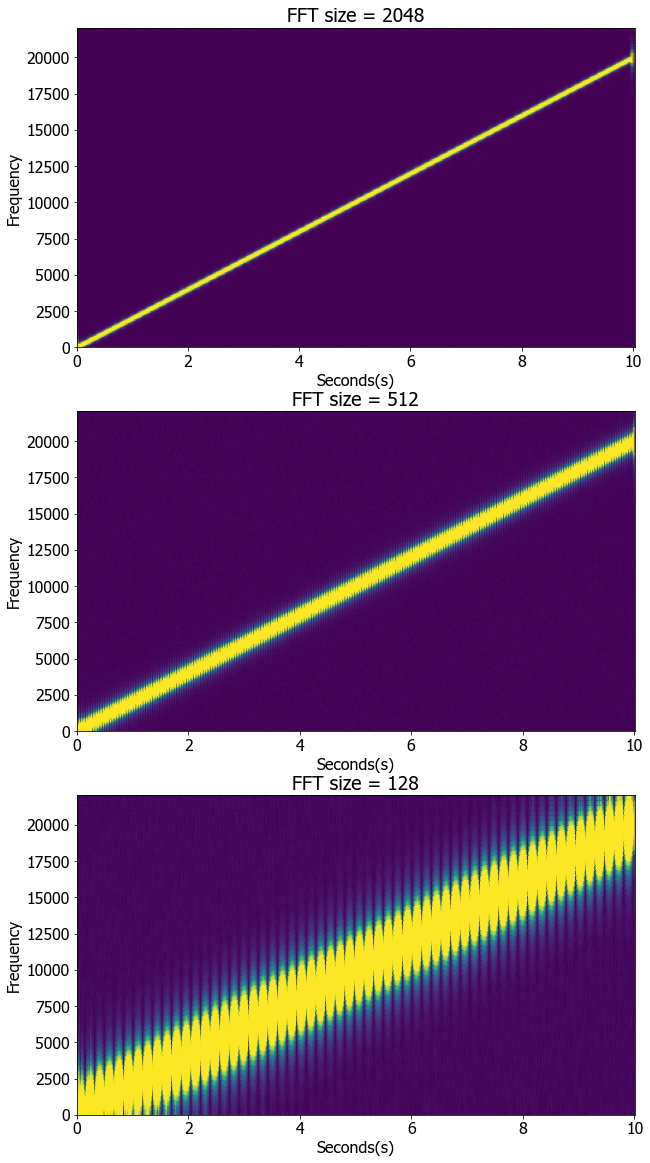

In [58]:
plt.rcParams['figure.figsize'] = [10, 20]
fig, axs = plt.subplots(3, 1, sharey='row')

f, t, Zxx = signal.stft(sine_sweep, samplerate, nperseg = 2048, noverlap = 0, return_onesided=True)
axs[0].pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1.0, shading='gouraud')
axs[0].set_xlabel("Seconds(s)")
axs[0].set_ylabel("Frequency")
axs[0].set_title("FFT size = 2048")

f, t, Zxx = signal.stft(sine_sweep, samplerate, nperseg = 512, noverlap = 0, return_onesided=True)
axs[1].pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1.0, shading='gouraud')
axs[1].set_xlabel("Seconds(s)")
axs[1].set_ylabel("Frequency")
axs[1].set_title("FFT size = 512")

f, t, Zxx = signal.stft(sine_sweep, samplerate, nperseg = 128, noverlap = 0, return_onesided=True)
axs[2].pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1.0, shading='gouraud')
axs[2].set_xlabel("Seconds(s)")
axs[2].set_ylabel("Frequency")
axs[2].set_title("FFT size = 128")

### <span style='color:Red'>Activity: Plot the Spectrogram for the accelerometer data</span>


Text(0.5, 1.0, 'Spectrogram of accelerometer data')

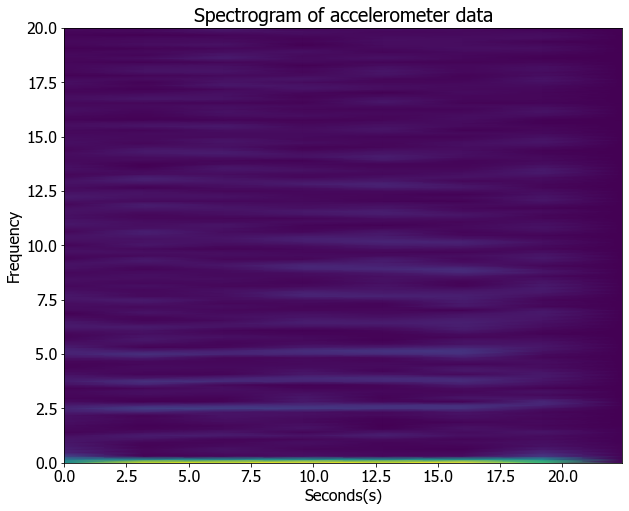

In [81]:
plt.rcParams['figure.figsize'] = [10, 8]
#fig, axs = plt.subplots(1, 1, sharey='row')

f, t, Zxx = signal.stft(acc_sig, 40, nperseg = 256, noverlap = 128, return_onesided=True)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(np.abs(Zxx)), shading='gouraud')
plt.xlabel("Seconds(s)")
plt.ylabel("Frequency")
plt.title("Spectrogram of accelerometer data")

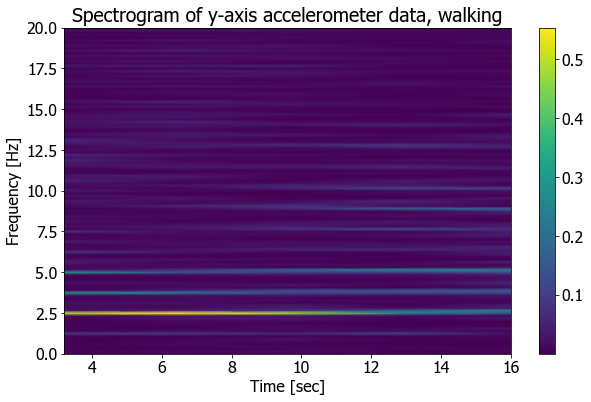

In [82]:
plt.rcParams["figure.figsize"] = (10, 6)

f, t, Sxx = signal.spectrogram(x = acc_sig, fs=40, nperseg=256, noverlap=128,)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of y-axis accelerometer data, walking")
plt.colorbar(c)
plt.show()

# Band power as feature

In [15]:
def aligned(a, alignment = 16):
    if (a.ctypes.data % alignment) == 0:
        return a
    assert alignment % a.itemsize == 0
    extra = alignment // a.itemsize
    buf = np.empty(a.size + extra, dtype = a.dtype)
    ofs = (-buf.ctypes.data % alignment) // a.itemsize
    aa = buf[ofs:ofs + a.size].reshape(a.shape)
    np.copyto(aa, a)
    assert aa.ctypes.data % alignment == 0
    return aa

In [ ]:
from numpy.fft import npfft, npifft

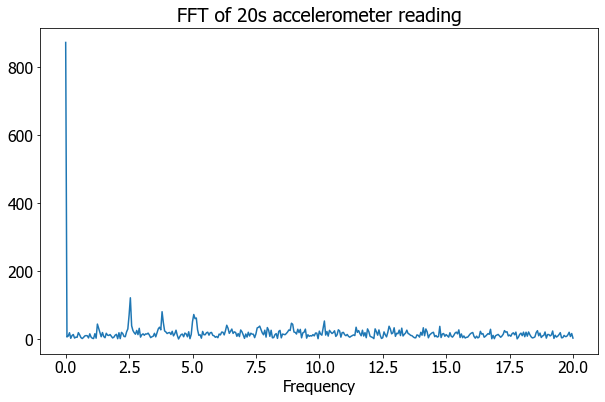

In [33]:
N = 20 * 40
samplerate = 40

# with scipy.fft.set_backend(acc_sig):
#     yf = scipy.fft.fft2(acc_sig)
#     #c = scipy.fft.fft2(cupy.asnumpy(a))
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['font.size'] = '16'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

yf = rfft(acc_sig.to_numpy())
xf = rfftfreq(N, 1 / samplerate)

plt.plot(xf, np.abs(yf))
plt.title("FFT of 20s accelerometer reading")
plt.xlabel("Frequency")
plt.show()

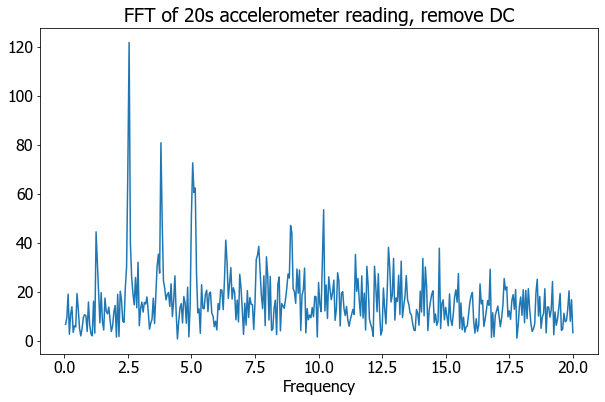

In [35]:
yf = rfft(acc_sig.to_numpy())
xf = rfftfreq(N, 1 / samplerate)

plt.plot(xf[1:], np.abs(yf)[1:])
plt.title("FFT of 20s accelerometer reading, remove DC")
plt.xlabel("Frequency")
plt.show()

## Estimate power density + calculate band power

Text(0.5, 0, 'Frequency(Hz)')

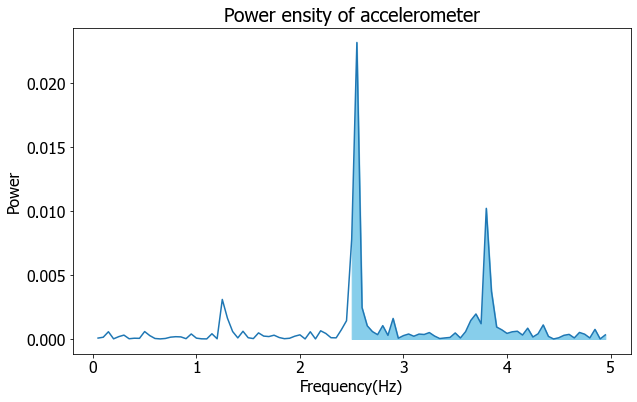

In [40]:
# Calculate power density
psd = np.power((1/(samplerate * 20)) * abs(yf), 2)

low, high = 2.5, 5
# Find intersecting values in frequency vector
idx_delta = np.logical_and(xf >= low, xf <= high)

plt.plot(xf[1:100], psd[:len(xf)][1:100])
plt.fill_between(xf[1:100], psd[:len(xf)][1:100], where=idx_delta[1:100], color='skyblue')
plt.title('Power ensity of accelerometer')
plt.ylabel('Power')
plt.xlabel('Frequency(Hz)')

In [41]:
band_power = np.sum(psd[:len(xf)][idx_delta])

In [42]:
band_power

0.07390064287960182